In [583]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings("ignore")
import plotly
!pip install chart_studio
!pip install cufflinks
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

# The purpouse of this project is to explore flight data in order to build a model to predict flight prices

## * Part 1 - Data collection & Pre-processing

### - Let's start by reading our data

In [584]:
train_data = pd.read_excel("Data_Train.xlsx")

In [585]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### - Now that we have our data, it's time to clean it up.  This will prepare the data for our model.

In [586]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [587]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### - Here we see that we have 1 null data among our route and total stops features

In [588]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [589]:
train_data.dropna(inplace=True)

In [590]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### - Now let's extract our target attributes and pre process our data

In [591]:
data = train_data.copy()

In [592]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [593]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [594]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])

In [595]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-12-17 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-17 05:50:00,2023-12-17 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-17 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-12-17 18:05:00,2023-12-17 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-12-17 16:50:00,2023-12-17 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2023-12-17 19:55:00,2023-12-17 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2023-12-17 20:45:00,2023-12-17 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2023-12-17 08:20:00,2023-12-17 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2023-12-17 11:30:00,2023-12-17 14:10:00,2h 40m,non-stop,No info,12648


In [596]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [597]:
data['Journey_Day'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month
data['Journey_Year'] = data['Date_of_Journey'].dt.year

In [598]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-12-17 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-17 05:50:00,2023-12-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-17 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-12-17 18:05:00,2023-12-17 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-12-17 16:50:00,2023-12-17 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


### - Now we have our travel times converted to date time, and added features to our dataframe for days, months and years.  These features are now ready for further cleaning & model processing.  Let's get our departure & arrival time cleaned & ready.

In [599]:
data['Dep_Hour'] = data['Dep_Time'].dt.hour
data['Dep_Min'] =  data['Dep_Time'].dt.minute
data['Arriv_Hour'] = data['Arrival_Time'].dt.hour
data['Arriv_Min'] = data['Arrival_Time'].dt.minute

In [600]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arriv_Hour,Arriv_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-12-17 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-17 05:50:00,2023-12-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-17 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [601]:
data.drop(['Dep_Time','Arrival_Time'], axis='columns', inplace=True)

In [602]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arriv_Hour,Arriv_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


## * Part 2 - Data Analysis

### - We will analyze the data to gain general insight.  First let's take a look at when most flights arrive & depart, while categorizing the times for vizualization purpouses.

In [603]:
def departure_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

In [604]:
data['Dep_Hour'].apply(departure_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Hour, Length: 10682, dtype: object

In [605]:
data['Dep_Hour'].apply(departure_time).value_counts().iplot(kind='bar', color='cyan', title="Departure Times")

In [606]:
data['Arriv_Hour'].apply(departure_time).value_counts().iplot(kind='bar', color='green', title="Arrival Times")

### - Now we'll look at the flight duration for analysis.  This will require some pre processing so that python can understand our times.

In [607]:
def duration_process(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'

    return x

In [608]:
data['Duration'] = data['Duration'].apply(duration_process)

In [609]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arriv_Hour,Arriv_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25


In [610]:
data['Duration_Hour'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data['Duration_Minute'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [611]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arriv_Hour,Arriv_Min,Duration_Hour,Duration_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


### - Comparing duration and price features

In [612]:
data['Duration_minutes'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [613]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arriv_Hour,Arriv_Min,Duration_Hour,Duration_Minute,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140


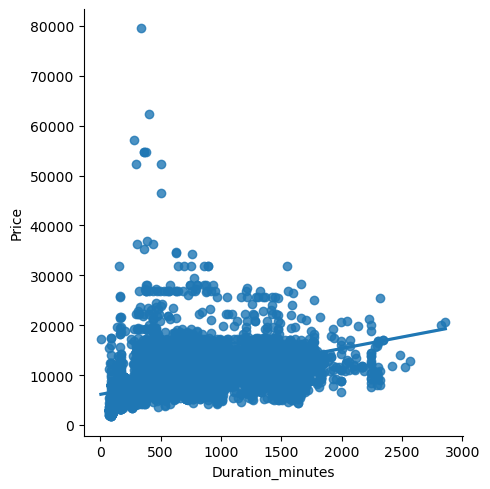

In [614]:
sns.lmplot(x="Duration_minutes", y="Price", data=data)

### - Here we can seee that total duration is positively correlated with price, however it doesn't increase the cost significantly.

### - Now let's compare airport usage and price

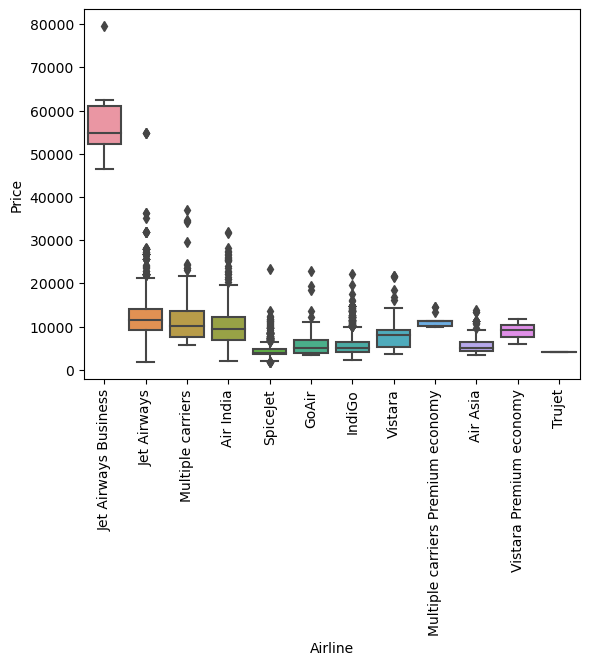

In [615]:
sns.boxplot(y="Price", x="Airline", data=data.sort_values("Price", ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [616]:
AirlineTotals = data.groupby(['Airline']).size().reset_index(name='count')
AirlineTotals

,Airline,count
0,Air Asia,319
1,Air India,1751
2,GoAir,194
3,IndiGo,2053
4,Jet Airways,3849
5,Jet Airways Business,6
6,Multiple carriers,1196
7,Multiple carriers Premium economy,13
8,SpiceJet,818
9,Trujet,1


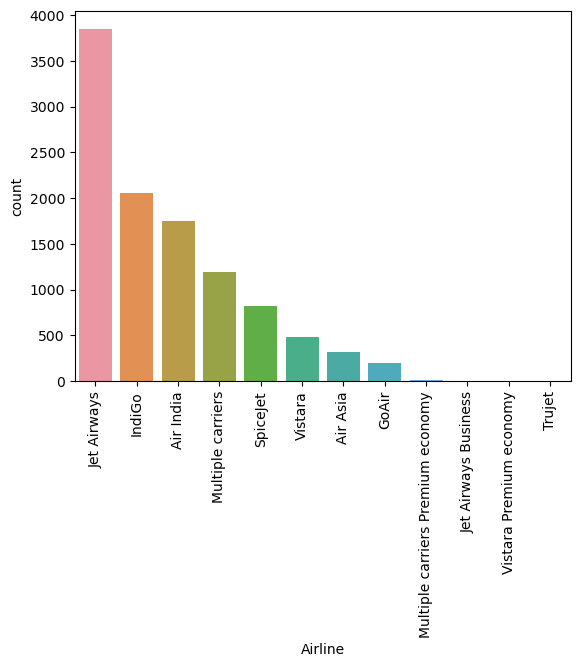

In [617]:
sns.barplot(x="Airline", y="count", data=AirlineTotals.sort_values("count", ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [618]:
df1 = data[data['Airline']== 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

In [619]:
df1

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

### - From the plots, we see Jet Airways has the highest average price, and the most usage.  Here are their routes sorted by total amounts.

## * Part 3 - Feature Encoding

In [620]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arriv_Hour,Arriv_Min,Duration_Hour,Duration_Minute,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325


In [621]:
cat_column = [col for col in data.columns if data[col].dtype=='object']
numerical_column = [col for col in data.columns if data[col].dtype!='object']

In [622]:
cat_column

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [623]:
numerical_column

['Date_of_Journey',
 'Price',
 'Journey_Day',
 'Journey_Month',
 'Journey_Year',
 'Dep_Hour',
 'Dep_Min',
 'Arriv_Hour',
 'Arriv_Min',
 'Duration_Hour',
 'Duration_Minute',
 'Duration_minutes']

In [624]:
for sub in data['Source'].unique():
    data['Source_' + sub] = data['Source'].apply(lambda x:1 if x==sub else 0)

In [625]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arriv_Hour,Arriv_Min,Duration_Hour,Duration_Minute,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0


### - Now I'll utilize target encoding and sort by the average flight price of each airline

In [626]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [627]:
dict_air = {key:index for index, key in enumerate(airlines,0)}
dict_air

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [628]:
data['Airline'] = data['Airline'].map(dict_air)
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [629]:
data.head(6)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arriv_Hour,Arriv_Min,Duration_Hour,Duration_Minute,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0
5,1,2019-06-24,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,...,11,25,2,25,145,0,1,0,0,0


In [630]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

### - Since we have Delhi listed twice, we will create one reference

In [631]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [632]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [633]:
destinations = data.groupby(['Destination'])['Price'].mean().sort_values().index
destinations

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [634]:
dict_dest = {key:index for index, key in enumerate(destinations,0)}
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [635]:
data['Destination'] = data['Destination'].map(dict_dest)

In [636]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [637]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arriv_Hour,Arriv_Min,Duration_Hour,Duration_Minute,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-01-03,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


### - My next focus will be on the Total_Stops feature for encoding

In [638]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [639]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [640]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arriv_Hour,Arriv_Min,Duration_Hour,Duration_Minute,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-01-03,Banglore,2,BLR → NAG → DEL,4h 45m,1,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


### - Now to remove some fields not useful to my model

In [641]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Hour', 'Dep_Min', 'Arriv_Hour',
       'Arriv_Min', 'Duration_Hour', 'Duration_Minute', 'Duration_minutes',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [642]:
data['Additional_Info'].describe()

count       10682
unique         10
top       No info
freq         8344
Name: Additional_Info, dtype: object

In [643]:
data = data.drop(columns = ['Date_of_Journey', 'Additional_Info', 'Duration_minutes', 'Source', 'Journey_Year'])

In [644]:
data.head(5)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arriv_Hour,Arriv_Min,Duration_Hour,Duration_Minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,BLR → NAG → DEL,4h 45m,1,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [645]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arriv_Hour',
       'Arriv_Min', 'Duration_Hour', 'Duration_Minute', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [646]:
data.drop(columns = 'Route', axis=1, inplace=True)

In [647]:
data.head(4)

,Airline,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arriv_Hour,Arriv_Min,Duration_Hour,Duration_Minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,5h 25m,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0


In [648]:
data.drop(columns = 'Duration', axis=1, inplace=True)

In [649]:
data.head(4)

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arriv_Hour,Arriv_Min,Duration_Hour,Duration_Minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0


## * Part 4 - dealing with outliers

### - The data is looking pretty clean, but now lets take a look at outliers and eliminate them

In [650]:
def plot(df, col):
    fig , (ax1, ax2, ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col], ax=ax1, color='red')
    sns.boxplot(df[col], ax=ax2, color='blue')
    sns.distplot(df[col], ax=ax3, kde=False, color='orange')

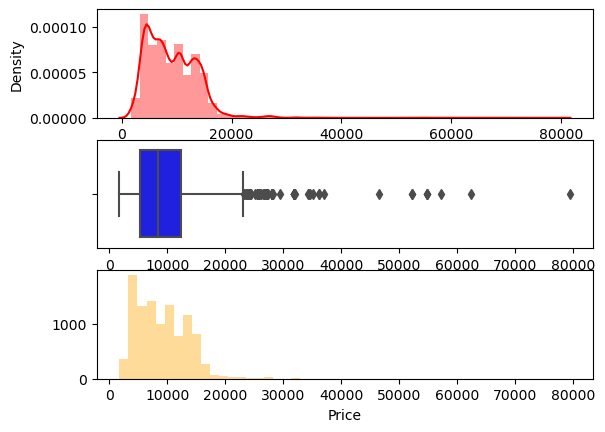

In [651]:
plot(data, 'Price')

In [652]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1

max = q3 + 1.5*iqr
min = q1 - 1.5*iqr

In [653]:
print([price for price in data['Price'] if price > max or price < min])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [654]:
np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

## * Part 5 - Feature Selection

### - Choosing price as our target data, everything else will be considered independent

In [655]:
y = data['Price']
X = data.drop(['Price'], axis=1)

In [656]:
from sklearn.feature_selection import mutual_info_regression

In [657]:
important = mutual_info_regression(X,y)

In [658]:
imp = pd.DataFrame(important, index=X.columns)

In [659]:
imp.columns = ['Importance Regression']

In [660]:
imp

,Importance Regression
Airline,0.974115
Destination,0.990978
Total_Stops,0.794196
Journey_Day,0.201245
Journey_Month,0.240243
Dep_Hour,0.348502
Dep_Min,0.265920
Arriv_Hour,0.398182
Arriv_Min,0.344049
Duration_Hour,0.481649


In [661]:
imp.sort_values(by="Importance Regression", ascending=False)

,Importance Regression
Destination,0.990978
Airline,0.974115
Total_Stops,0.794196
Source_Delhi,0.525314
Duration_Hour,0.481649
Source_Kolkata,0.456417
Arriv_Hour,0.398182
Source_Banglore,0.394540
Dep_Hour,0.348502
Arriv_Min,0.344049


### Displayed is the importance of each field compared to the price, and in this case I will keep them all for my model

## * Part 6 - Model Building

In [662]:
from sklearn.model_selection import train_test_split

In [663]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [664]:
from sklearn.ensemble import RandomForestRegressor

In [665]:
ml_model = RandomForestRegressor()
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [666]:
y_predictions = ml_model.predict(X_test)
y_predictions

array([16755.79,  6550.71,  8873.29, ...,  5745.5 ,  3115.75,  7030.92])

In [667]:
from sklearn import metrics

In [668]:
metrics.r2_score(y_test, y_predictions)

0.798008055318836

### - Saving my model to a seperate file

In [669]:
!pip install pickle_mixin

In [670]:
import pickle

In [671]:
file = open('rf_random.pkl', 'wb')

In [672]:
pickle.dump(ml_model, file)

## * Part 7 -  Model Evaluation

### - Here I'll define a function to find the mean absolute percentage error

In [683]:
def mapeEval(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [684]:
mapeEval(y_test, y_predictions)

13.282487018693672

## - Using sklearn metrics for evaluation

In [685]:
from sklearn import metrics

In [689]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training Score: {}'.format(model.score(X_train, y_train)))
    y_predict = model.predict(X_test)
    print('Predictions are: {}'.format(y_predict))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_predict)
    print('r2 score: {}'.format(r2_score))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_predict)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_predict)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predict))))
    print('MAPE: {}'.format(mapeEval(y_test, y_predict)))
    sns.distplot(y_test - y_predict)

Training Score: 0.9551104302319097
Predictions are: [16740.53  6393.76  8976.69 ...  5863.8   3126.25  6989.  ]


r2 score: 0.7970644976893214
MAE: 1188.6033929776931
MSE: 4140072.2829781007
RMSE: 2034.716757432862
MAPE: 13.269575274544657


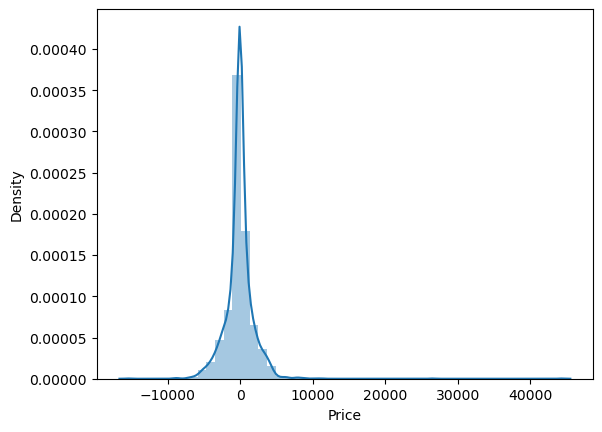

In [690]:
predict(RandomForestRegressor())

In [691]:
from sklearn.tree import DecisionTreeRegressor

Training Score: 0.9729700065222148
Predictions are: [16840.  5752.  9187. ...  5601.  3100.  6734.]


r2 score: 0.7007288985774738
MAE: 1369.1915808632345
MSE: 6105407.767433958
RMSE: 2470.912335036182
MAPE: 15.117331965062753


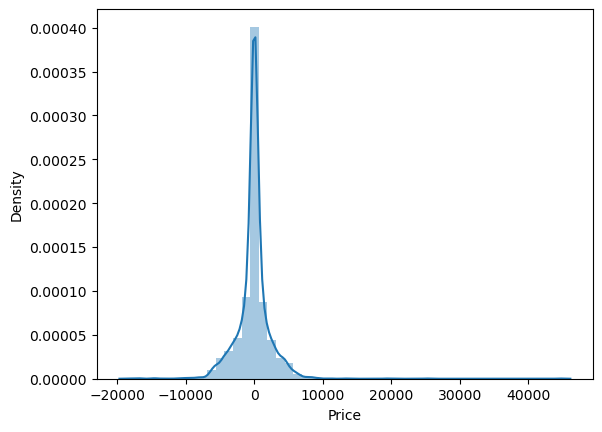

In [692]:
predict(DecisionTreeRegressor())

## * Part 8 - Model Optimization

In [693]:
from sklearn.model_selection import RandomizedSearchCV

In [694]:
reg_rf = RandomForestRegressor()

In [696]:
lin = np.linspace(start=100, stop=1200, num=6)
lin

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [697]:
n_estimators = [int(x) for x in lin]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=4)]

min_samples_split = [5,10,15,100]

In [698]:
grid = {
    'n_estimators' : n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split' : min_samples_split
}

In [699]:
grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [700]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=grid, cv=3, n_jobs=-1, verbose=2)

In [701]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [703]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 13}

In [704]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_split=5)

In [705]:
rf_random.best_score_

0.797396488786768

[CV] END max_depth=30, max_features=sqrt, min_samples_split=15, n_estimators=540; total time=   3.0s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=100, n_estimators=1200; total time=   3.8s
[CV] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=980; total time=   5.1s
[CV] END max_depth=21, max_features=auto, min_samples_split=15, n_estimators=540; total time=   5.6s
[CV] END max_depth=5, max_features=auto, min_samples_split=100, n_estimators=1200; total time=   6.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=15, n_estimators=320; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=320; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=15, n_estimators=540; total time=   3.0s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=15, n_estimators=760; total time=   3.0s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=15, n_estimators=760; total ti

# Conclusion

## - Through data anlysis, cleaning, and feature encoding I have built a machine learning model that can predict prices of flights that fit within this context.  Even without optimization, my model showed an r2 score of.79! 